In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()


,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [3]:
data = data.drop(["OPEN", "HIGH", "LOW", "VOLUME","CHANGE(%)"], axis =1 )

In [5]:
data["DATE"] = pd.to_datetime(data["DATE"], format="%d-%b-%y")
data["MONTH"] = data["DATE"].dt.month
data["YEAR"]= data["DATE"].dt.year
data.head()

,DATE,PRICE,MONTH,YEAR
0,2024-06-13,1242.20,6,2024
1,2024-06-12,1227.70,6,2024
2,2024-06-11,1209.40,6,2024
3,2024-06-10,1163.30,6,2024
4,2024-06-07,1150.85,6,2024


In [9]:
table1 = data.groupby(["YEAR", "MONTH"])["PRICE"].mean()
table1

YEAR  MONTH
2019  6        1228.622222
      7        1232.097826
      8        1243.562500
      9        1262.131579
      10       1262.175000
                  ...     
2024  2         921.442857
      3         859.702632
      4         954.280000
      5        1001.145455
      6        1143.711111
Name: PRICE, Length: 61, dtype: float64

In [10]:
ma = table1.rolling(window=12).mean()
ma

YEAR  MONTH
2019  6               NaN
      7               NaN
      8               NaN
      9               NaN
      10              NaN
                  ...    
2024  2        916.554683
      3        895.023156
      4        891.925411
      5        900.862722
      6        921.641823
Name: PRICE, Length: 61, dtype: float64

In [12]:
ratio = table1*100/ma
ratio

YEAR  MONTH
2019  6               NaN
      7               NaN
      8               NaN
      9               NaN
      10              NaN
                  ...    
2024  2        100.533320
      3         96.053675
      4        106.991009
      5        111.131855
      6        124.094967
Name: PRICE, Length: 61, dtype: float64

In [15]:
table2=ratio.unstack()

In [16]:
monthlyAvg = table2.mean(axis=0)
monthlyAvg

MONTH
1     101.849635
2     104.206737
3     112.967222
4     112.278346
5      98.361547
6      99.045349
7      91.213218
8      89.453841
9      91.925036
10     92.041275
11     91.017046
12     94.928176
dtype: float64

In [17]:
generalAvg = monthlyAvg.mean()

In [19]:
seasonalIndices = monthlyAvg*100/ generalAvg
seasonalIndices

MONTH
1     103.638485
2     106.036986
3     114.951337
4     114.250362
5     100.089133
6     100.784945
7      92.815253
8      91.024975
9      93.539573
10     93.657854
11     92.615636
12     96.595460
dtype: float64

In [51]:
deseasonalizedData = table1.unstack()*100/seasonalIndices
deseasonalizedData = deseasonalizedData.stack()

In [52]:
deseasonalizedData.index

MultiIndex([(2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10),
            (2020, 11),
            (2020, 12),
            (2021,  1),
            (2021,  2),
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (2021,  6),
            (2021,  7),
            (2021,  8),
            (2021,  9),
            (2021, 10),
            (2021, 11),
            (2021, 12),
            (2022,  1),
            (2022,  2),
            (2022,  3),
            (2022,  4),
            (2022,  5),
            (2022,  6),
            (2022,  7),
            (2022,  8),
            (2022,  9),
            (2022, 10),
            (202

Text(0.5, 1.0, 'Deasonalized values')

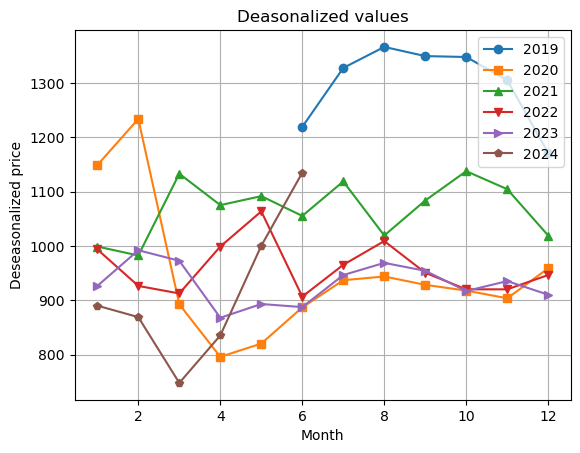

In [59]:
multindex = deseasonalizedData.index
years = multindex.get_level_values(0).unique().sort_values().values
markers = ["o", "s", "^","v",">", "p"]

for year in years:
    plt.plot(deseasonalizedData[year].index, deseasonalizedData[year], label=str(year), marker=markers[year%2019])
plt.legend()
plt.grid()
plt.xlabel("Month")
plt.ylabel("Deseasonalized price")
plt.title("Deasonalized values")


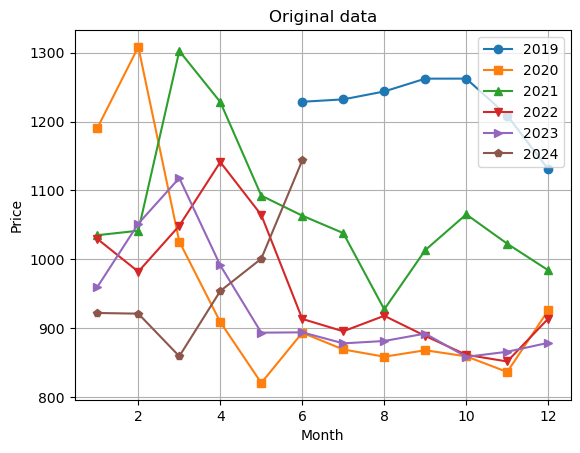

In [60]:
#original values 
for year in years:
    plt.plot(table1[year].index, table1[year], label=str(year), marker = markers[year%2019])
plt.title("Original data")
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend()
plt.grid()

/tmp/ipykernel_27418/1597615681.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


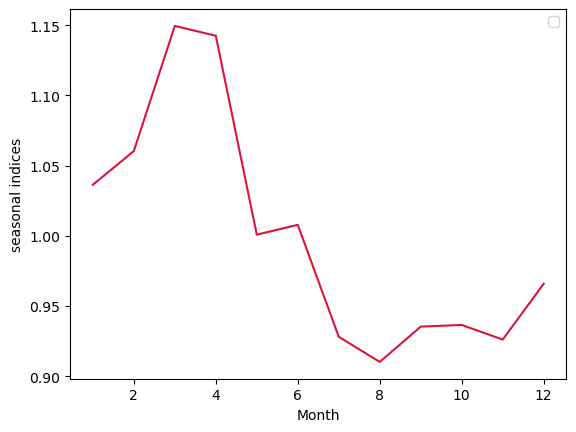

In [62]:
#seasonal indices
plt.plot(seasonalIndices.index, seasonalIndices/100,color="crimson")
plt.xlabel("Month")
plt.ylabel("seasonal indices")
plt.legend()